<a href="https://colab.research.google.com/github/jtrobec/mids-w241-fa2020-fp/blob/main/comparingAppleToApple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pictures are stored under images folder in gdrive
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/MIDS/MIDS241/GroupProject/

/content/drive/My Drive/MIDS/MIDS241/GroupProject


In [5]:
import numpy as np
import matplotlib.pyplot as plt

#to import pictures as numpy
import PIL
from PIL import Image
from matplotlib import pyplot


In [14]:
#the reference image
a0 = Image.open('images/apple0.JPG')
print(a0.format) #it is jpeg
print(a0.size) #size of image
print(a0.mode) #it is RGB

JPEG
(488, 460)
RGB


In [10]:
#a0 is not a matrix yet
#a0

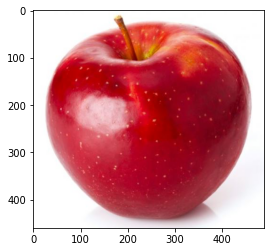

In [8]:
## display the image
pyplot.imshow(a0)

## Convert the picutre into matrix with 256 by 256

In [20]:
#converting jepg to matrix with integers
ma0 = np.array(a0.convert('L').resize((256,256)))
print(ma0.shape)
#now it is
ma0

(256, 256)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

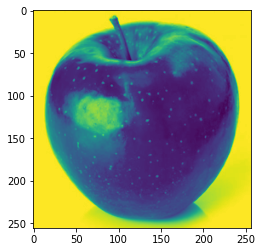

In [19]:
pyplot.imshow(ma0)

## Get other pictures

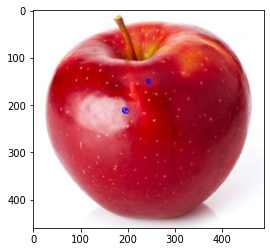

In [24]:
pyplot.imshow(Image.open('images/apple1.JPG'))

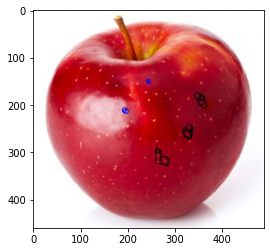

In [25]:
pyplot.imshow(Image.open('images/apple2.JPG'))

In [22]:
#the future apple condition
ma1 = np.array(Image.open('images/apple1.JPG').convert('L').resize((256,256)))
ma2 = np.array(Image.open('images/apple2.JPG').convert('L').resize((256,256)))

In [68]:
#flatten to vector
m0 = ma0.flatten()
m1 = ma1.flatten()
m2 = ma2.flatten()

# Not really sure what is going on here

In [97]:
#our vector
m0.shape

(65536,)

In [98]:
#they all should produce the same value, but they are not
print(np.linalg.norm(m0))
print(np.sqrt(sum(m0**2)))
print(np.sqrt(np.dot(m0, m0)))

43290.7845620751
2318.950624743873
15.875


In [99]:
#small vector
temp = np.array([1, 2, 3])
temp.shape

(3,)

In [95]:
#producing the same values as expected
print(np.linalg.norm(temp))
print(np.sqrt(sum(temp**2)))
print(np.sqrt(np.dot(temp, temp)))

3.7416573867739413
3.7416573867739413
3.7416573867739413


In [100]:
#get the norm
m0_norm = np.sqrt(sum(temp**2)) 
c0 = (np.dot(temp,temp)/m0_norm**2)
proj00 = (np.dot(temp, temp)/m0_norm**2)*temp
print(round(c0)) 
print(proj00)

1.0
[1. 2. 3.]


In [66]:
#get the norm
m0_norm = np.sqrt(sum(m0**2)) 
c0 = np.dot(m0, m0)
proj00 = (np.dot(m0, m0)/m0_norm**2)*m0
print(round(c0)) 

0.0


In [78]:
m0_norm = np.sqrt(sum(m0**2)) 
print(m0_norm)

print(np.dot(m0,m0))
print(np.dot(m0,m0)/m0_norm**2)

2318.950624743873
252
4.6861645825631544e-05


In [67]:
d0 = m0-proj00
d0_norm = np.sqrt(sum(d0**2))
print(d0_norm) 

43288.75588466474


In [64]:
#projection a1 to a0
proj10 = (np.dot(m1, m0)/m0_norm**2)*m0
d1 = m1-proj10
d1_norm = np.sqrt(sum(d1**2))
print(d1_norm) 

43277.74485222061


In [32]:
print(np.linalg.norm(m0))
print(np.linalg.norm(nm0)) #close enough

43290.7845620751
0.9999999999999958


# now normalize the vectors

In [41]:
#normalize the vector
nm0 = m0 / np.linalg.norm(m0)

nm1 = m1 / np.linalg.norm(m1)

nm2 = m2 / np.linalg.norm(m2)

In [46]:
np.linalg.norm(m0)- np.linalg.norm(m0)

0.0

In [50]:
#just comparing the norm
np.linalg.norm(m0)- np.linalg.norm(m1)

12.114030276185076

In [52]:
#comparing the norm of difference 
np.linalg.norm(m2-m0)

7215.408997416571

In [53]:
#using projection
round(np.linalg.norm(nm0 - np.dot(nm0,nm0)*nm0))

0.0

In [54]:
#using projection
round(np.linalg.norm(nm2 - np.dot(nm0,nm1)*nm0))

0.0

In [43]:
round(np.linalg.norm(nm2 - np.dot(nm0,nm2)*nm0))

0.0